# Physics 234 Midterm
## Feb 16,2024 12:00-12:50

Do the following problems. Use the Jupyter notebook, inserting your code and any textual answers/explanations in cells between the questions. (Feel free to add additional cells!) Marks will be given based on how clearly you demonstrate your understanding.

There are no restrictions on downloading from the internet, eclass, or the use of books, notes, or any other widely available computing resources. However, you are not allowed to communicate with each other or collaborate in any way and uploading to the internet or sending or receiving direct communications is not appropriate.  It is not appropriate to communicate and ask questions either of people or platforms like ChatGPT.  

When you are finished, upload the jupyter notebook to eclass. Eclass times out at 1:00 so make sure that you upload things before then. Also be careful to save the notebook periodically and that you upload the file that contains all your work.


# 1.  The density of water 

The density of water 
can be given by the expression

$$\rho(t) = a_5 \left( 1-\frac{(t+a_1)^2(t+a_2)}{a_3(t+a_4)} \right)$$

with:

* <math>a_1</math> = −3.983035 °C
* <math>a_2</math> = 301.797 °C
* <math>a_3</math> = 522528.9 °C<sup>2</sup>
* <math>a_4</math> = 69.34881 °C
* <math>a_5</math> = 999.974950 kg / m<sup>3</sup>

The cell below has the constants copied into parameters.  

Define the function to calculate the density, and plot it over the region from 0-100 C.  


Text(0, 0.5, 'Density [kg/m$^3$]')

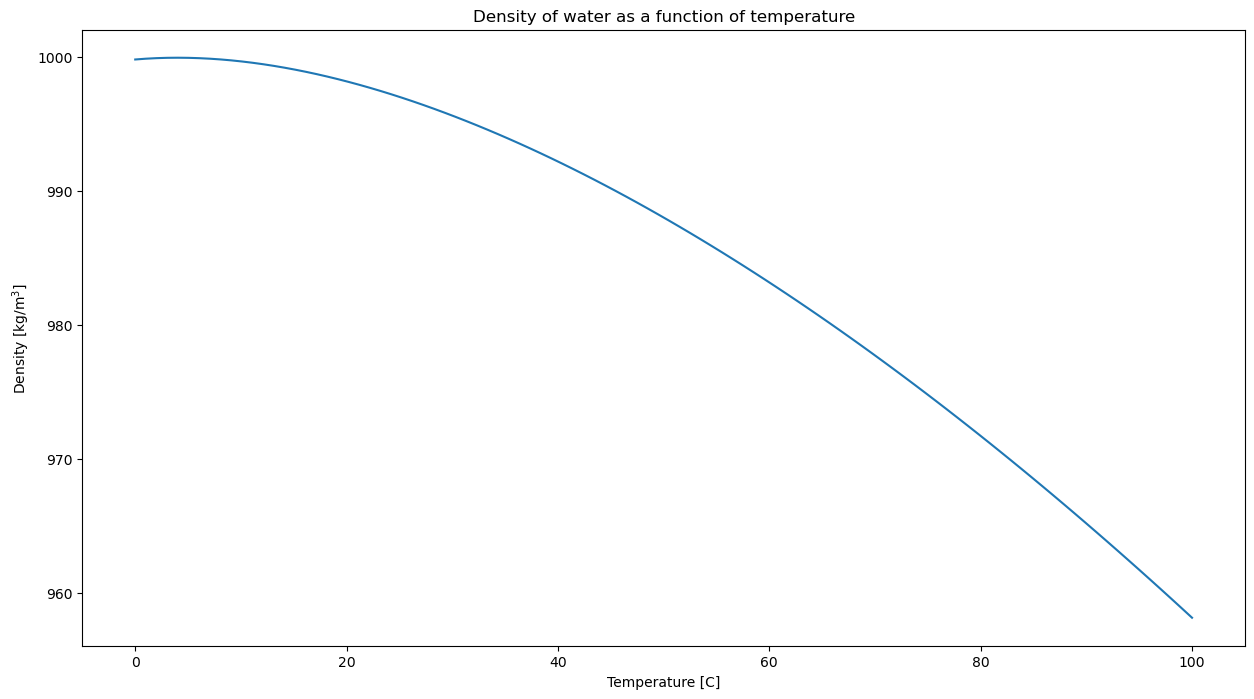

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=15,8

a_1 = -3.983035 #°C
a_2 = 301.797 #°C
a_3 = 522528.9 #°C2
a_4 = 69.34881 #°C
a_5 = 999.974950 #kg / m3

def rho(t):
    return a_5*(1-((t+a_1)**2 * (t+a_2))/a_3/(t+a_4))

tlist=np.linspace(0,100,100)
plt.plot(tlist,rho(tlist))
plt.title("Density of water as a function of temperature")
plt.xlabel("Temperature [C]")
plt.ylabel("Density [kg/m$^3$]")

##  The maximum density of water

Write a function to take the numerical derivative of the density. Then find the zero of the derivative and print out the temperature, to 5 decimal places, at which the density is maximum.  
Print the density at that temperature.  


Text(0.5, 0, 'Temperature [C]')

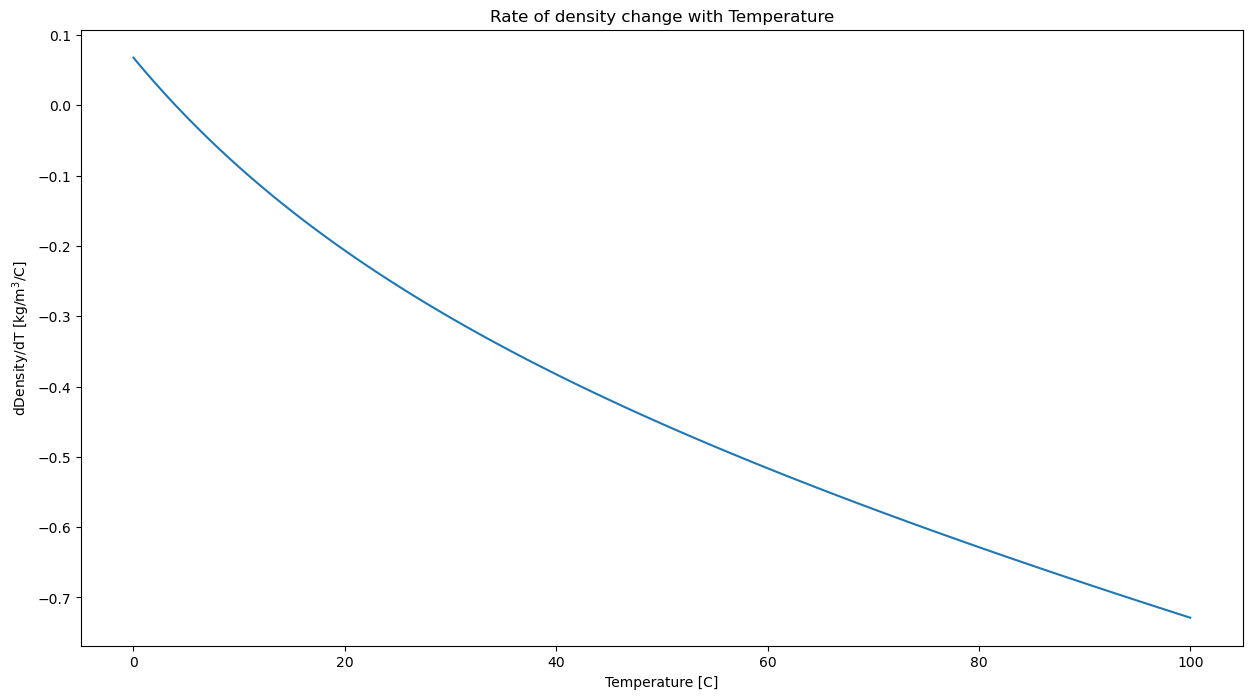

In [3]:
def drhodt(t):
    tp=t+1e-5
    tm=t-1e-5
    return (rho(tp)-rho(tm))/(tp-tm)

plt.plot(tlist,drhodt(tlist))
plt.title("Rate of density change with Temperature")
plt.ylabel("dDensity/dT [kg/m$^3$/C]")
plt.xlabel("Temperature [C]")

In [4]:
from scipy.optimize import root
tmax=root(drhodt,2).x[0]

In [5]:
print(f'The maximum density of water is {rho(tmax)} kg/m^3 and happens at {tmax:6.5} C')

The maximum density of water is 999.97495 kg/m^3 and happens at  3.983 C


# Index of refraction

The index of refraction of water, $n$ in terms of Temperature, $T$ (in Kelvin), wavelength $\lambda$ (in nm), and density $\rho~\rm{kg/m^3}$ satisfies the expression (J. Phys. Chem. Ref. Data, Vol. 19, No.3, 1990, page 677):
$$
\frac{n^{2}-1}{n^{2}+2}\frac{1}{\overline{\rho }}=a_{0}+a_{1}\overline{\rho}+a_{2}\overline{T}+a_{3}{\overline{\lambda}}^{2}\overline{T}+\frac{a_{4}}{{\overline{\lambda}}^{2}}+\frac{a_{5}}{{\overline{\lambda }}^{2}-{\overline{\lambda}}_{\mathit{UV}}^{2}}+\frac{a_{6}}{{\overline{\lambda}}^{2}-{\overline{\lambda }}_{\mathit{IR}}^{2}}+a_{7}{\overline{\rho}}^{2}$$

Where:

$
{\displaystyle {\overline {T}}={\frac {T}{T^{\text{*}}}}},
{\displaystyle {\overline {\rho }}={\frac {\rho }{\rho ^{\text{*}}}}}$, and
$\overline \lambda = \frac{\lambda}{\lambda^{\text{*}}}$. 
The coefficients are defined as follows, and are also in the following code block:
$$\begin {align}
a_{0} &= 0.244257733\\ 
a_{1} &= 0.00974634476\\
a_{2} &= −0.00373234996\\ 
a_{3} &= 0.000268678472\\ 
a_4 &= 0.0015892057\\ 
a_{5} &= 0.00245934259\\ 
a_{6} &= 0.90070492\\ 
a_{7} &= −0.0166626219\\ 
T^{*} &= 273.15 ~\rm{K}\\
\rho^{*} &= 1000 ~\rm{kg/m^3}\\ 
\lambda ^{{*}} &= 589 ~\rm{nm}\\ 
\overline\lambda_{\text{IR}} &= 5.432937\\ 
\overline\lambda_{\text{UV}} &= 0.229202
\end{align}$$

The density as a function of temperature is given by the function defined in question 1.  (If you were unable to define that function, just use a constant value of $\rho=960.0~ \rm{kg/m^3}$ in your solution).  

Define the function n(T,lam) that calculates n at a given temperature and wavelength, and then plot the index of refraction as a function of $\lambda$ at a temperature $T=50~\rm{C}.$

1.339409111255937


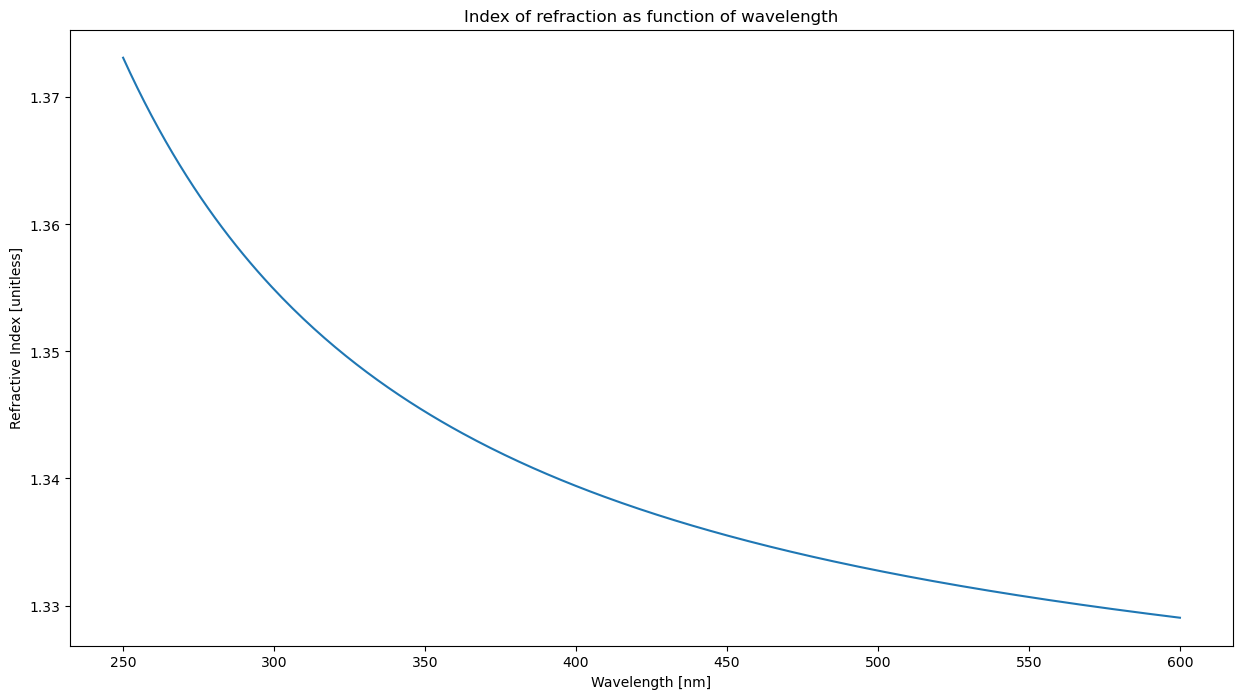

In [10]:
a0 = 0.244257733 
a1 = 0.00974634476
a2 = -0.00373234996 
a3 = 0.000268678472 
a4 = 0.0015892057 
a5 = 0.00245934259 
a6 = 0.90070492 
a7 = -0.0166626219 
TStar = 273.15 # K
rhoStar = 1000  # kg/m^3 
lambdaStar  = 589 # nm 
lambdaIR = 5.432937 
lambdaUV = 0.229202

def func(n,T,lam): #T,lam inputs in Celsius and nm
    TBar=(T+TStar)/TStar
    rhoBar=rho(T)/rhoStar
    lBar=lam/lambdaStar
    return (n**2-1)/(n**2+2)*1/rhoBar-(a0+a1*rhoBar+ a2*TBar + a3*lBar**2*TBar + a4/lBar**2 + 
            a5/(lBar**2-lambdaUV**2)+a6/(lBar**2-lambdaIR**2)+a7*rhoBar**2)

from scipy.optimize import root
def n(T,lam):
    return root(func,1.2,args=(T,lam)).x[0]

llist=np.linspace(250,600,300)
plt.plot(llist,[n(50,l) for l in llist])
plt.title("Index of refraction as function of wavelength")
plt.xlabel("Wavelength [nm]")
plt.ylabel("Refractive Index [unitless]")

print (n(50,400))

With polynomials.
$$
\frac{n^{2}-1}{n^{2}+2}=k$$
$$n^{2}-1=k(n^{2}+2)$$
$$n^2(1-k)=1+2k$$

Text(0, 0.5, 'Refractive Index [unitless]')

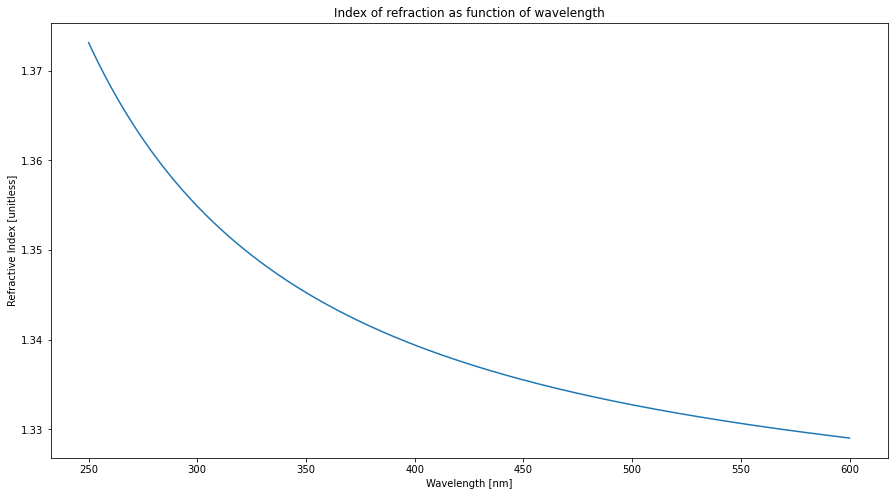

In [16]:
a0 = 0.244257733 
a1 = 0.00974634476
a2 = -0.00373234996 
a3 = 0.000268678472 
a4 = 0.0015892057 
a5 = 0.00245934259 
a6 = 0.90070492 
a7 = -0.0166626219 
TStar = 273.15 # K
rhoStar = 1000  # kg/m^3 
lambdaStar  = 589 # nm 
lambdaIR = 5.432937 
lambdaUV = 0.229202

#solution with polynomial-- need to do 

def rhs(T,lam): #input in Celsius and nm
    TBar=(T+TStar)/TStar
    rhoBar=rho(T)/rhoStar
    lBar=lam/lambdaStar
    return rhoBar*(a0+a1*rhoBar+ a2*TBar + a3*lBar**2*TBar + a4/lBar**2 + 
            a5/(lBar**2-lambdaUV**2)+a6/(lBar**2-lambdaIR**2)+a7*rhoBar**2)

def n(T,lam):
    r=rhs(T,lam)
    return np.polynomial.Polynomial([-1-2*r,0,1-r]).roots()

llist=np.linspace(250,600,300)
plt.plot(llist,[n(50,l)[1] for l in llist])
plt.title("Index of refraction as function of wavelength")
plt.xlabel("Wavelength [nm]")
plt.ylabel("Refractive Index [unitless]")


One can do this completely analytically, but doesn't show understanding of numerics!
$$
\frac{n^{2}-1}{n^{2}+2}=k$$
$$n^{2}-1=k(n^{2}+2)$$
$$n^2(1-k)=1+2k$$
$$n=\sqrt{\frac{1+2k}{1-k}}$$



Text(0, 0.5, 'Refractive Index [unitless]')

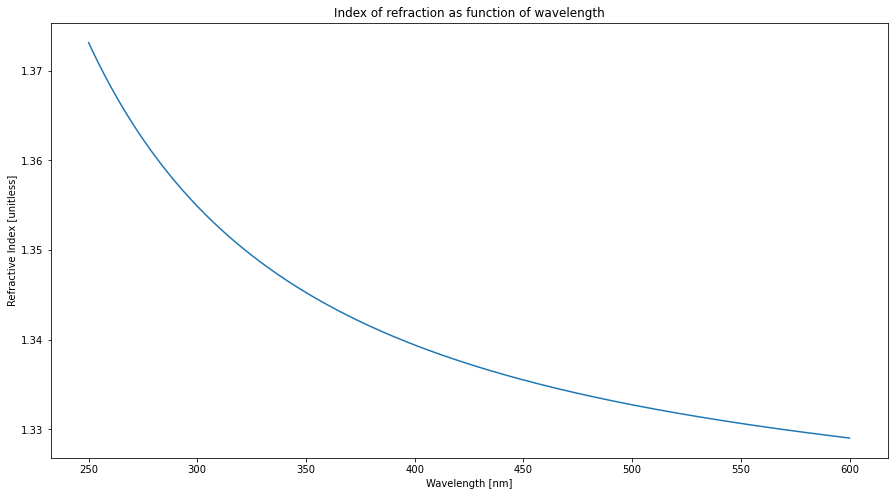

In [17]:
def n(T,lam):
    k=rhs(T,lam)
    return np.sqrt((1+2*k)/(1-k))

llist=np.linspace(250,600,300)
plt.plot(llist,[n(50,l) for l in llist])
plt.title("Index of refraction as function of wavelength")
plt.xlabel("Wavelength [nm]")
plt.ylabel("Refractive Index [unitless]")


# 3.  Interpolation

Run the code in the cell below.  This will plot a diagram that defines the two angles and plots a function, beta(a) that relates one to the other.  Write a function, interp(a) that uses polynomial interpolation to approximate beta.  Pick parameters so that the interpolation agrees with beta(a) within 1e-10, and demonstrate that is the case. 

You don't need to understand the code or what it represents to do this question, and I would suggest that you ignore the code.  



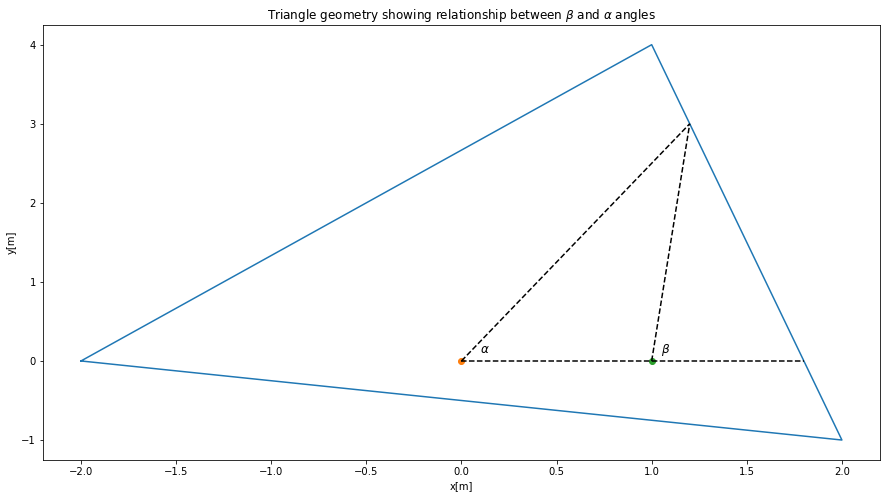

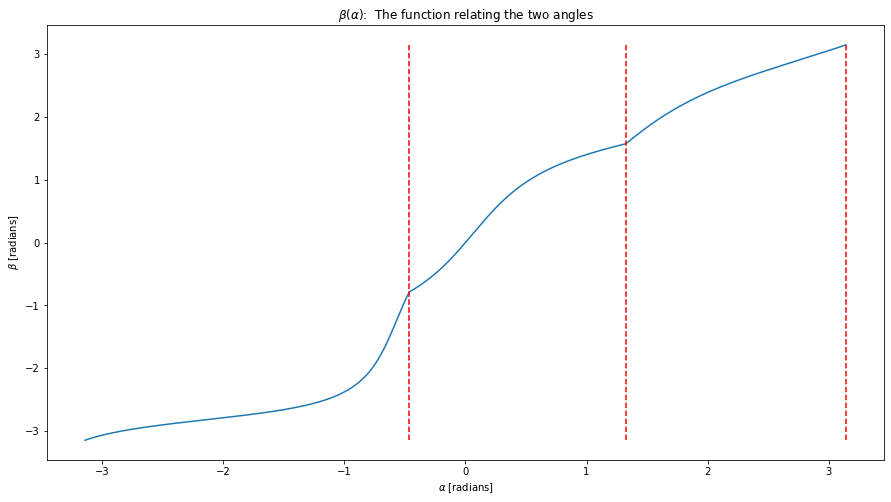

The corners of the triangle are in the "corners" np.array, with values alpha= [ 3.14159265  1.32581766 -0.46364761]


In [38]:
from scipy.optimize import root
s1=np.array([-2,0])
s2=np.array([1,4])
s3=np.array([2,-1])
o0=np.array([0,0])
o2=np.array([1,0])
ss=np.stack((s1,s2,s3,s1))

def t2(aa,o):
    if aa<1:
        v=(1-aa)*s1+aa*s2
    elif aa<2:
        v=(2-aa)*s2+(aa-1)*s3
    else:
        v=(3-aa)*s3+(aa-2)*s1                    
    vo=v-o
    return np.arctan2(vo[1],vo[0])

def alpha(angle,o):
        return root(lambda a:t2(a,o)-angle,1.5,tol=1e-14).x

ax=alpha(0,o0)
vx=(2-ax)*s2+(ax-1)*s3
v2=.8*s2+.2*s3


plt.plot(ss[:,0],ss[:,1])
plt.plot(o0[0],o0[1],'o')
plt.plot(o2[0],o2[1],'o')
plt.plot([o0[0],vx[0]],[0,0],'k--')
plt.plot([o0[0],v2[0]],[0,v2[1]],'k--')
plt.plot([o2[0],v2[0]],[0,v2[1]],'k--')
plt.text(o0[0]+0.1,0.1,r'$\alpha$',size='large')
plt.text(o2[0]+0.05,0.1,r'$\beta$',size='large')
plt.title(r"Triangle geometry showing relationship between $\beta$ and $\alpha$ angles")
plt.xlabel('x[m]')
plt.ylabel('y[m]')
plt.show()

corners=np.array([t2(0,o0),t2(1,o0),t2(2,o0)])

def beta(a1):
    if a1<corners[2]:
        guess=2.5
    elif a1<corners[1]:
        guess=1.5
    else:
        guess=0.5
    return t2(root(lambda a:t2(a,o0)-a1,guess,tol=1e-14).x,o2)

aspace=np.linspace(-np.pi+1e-5,np.pi-1e-5,1000)

plt.title(r"$\beta(\alpha)$:  The function relating the two angles")
plt.xlabel(r'$\alpha$ [radians]')
plt.ylabel(r'$\beta$ [radians]')
plt.plot(aspace,[beta(a)for a in aspace])
plt.plot([corners[0],corners[0]],[-np.pi,np.pi],'r--')
plt.plot([corners[1],corners[1]],[-np.pi,np.pi],'r--')
plt.plot([corners[2],corners[2]],[-np.pi,np.pi],'r--')
plt.title
plt.show()
print('The corners of the triangle are in the "corners" np.array, with values alpha=',corners,)



Text(0.5, 0, 'Alpha angle [radians]')

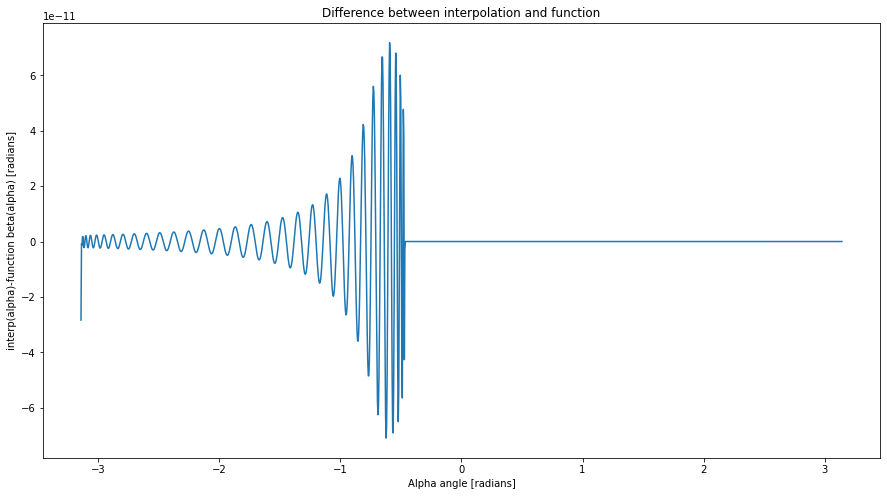

In [28]:
from scipy.interpolate import BarycentricInterpolator
from numpy.polynomial.chebyshev import chebpts1
nc=64
a1=(corners[2]+np.pi)/2.0*(chebpts1(nc)+1)-np.pi  #map chebpts [-1,1] to [0,2] to [-np.pi, corners[2]]
a2=(corners[1]-corners[2])/2.0*(chebpts1(nc)+1)+corners[2]
a3=(corners[0]-corners[1])/2.0*(chebpts1(nc)+1)+corners[1]
bci1=BarycentricInterpolator(a1,np.array([beta(a)for a in a1]))
bci2=BarycentricInterpolator(a2,np.array([beta(a)for a in a2]))
bci3=BarycentricInterpolator(a3,np.array([beta(a)for a in a3]))

def interps(a):
    if a<= corners[2]:
        return bci1(a)
    elif a<=corners[1]:
        return bci2(a)
    else:
        return bci3(a)
interp=np.vectorize(interps)
alist=np.linspace(-np.pi,np.pi,1500)
plt.plot(alist,interp(alist)-np.array([beta(a)for a in alist]))
plt.title("Difference between interpolation and function")
plt.ylabel("interp(alpha)-function beta(alpha) [radians]")
plt.xlabel("Alpha angle [radians]")

## Solution with chebinterpolate and chebval.  
This is a little more complicated because it requires both a map and an inverse map.  But it is a little more flexible because it gives us access to the chebyshev coefficients, so we can truncate without recalculating.  

Text(0.5, 0, 'Alpha angle [radians]')

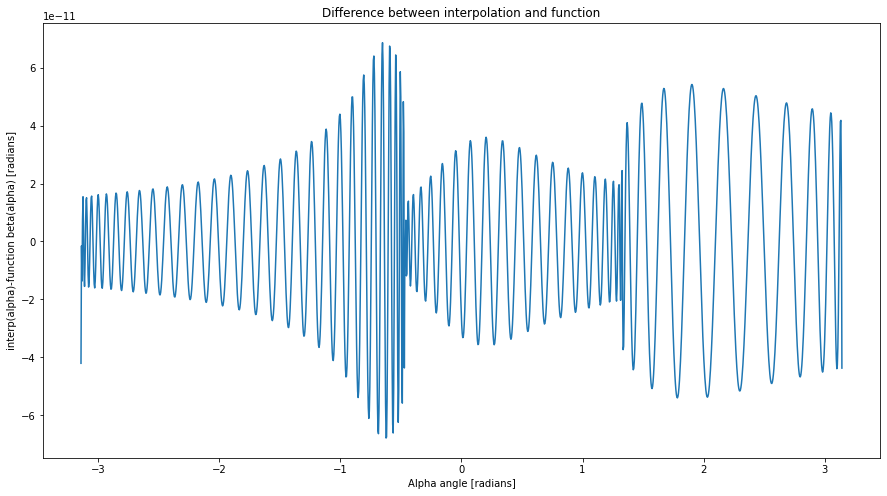

In [65]:
from numpy.polynomial.chebyshev import chebpts1,chebinterpolate, chebval

def map(x, ll,ul):
    return (x+1)*(ul-ll)/2.0+ll  # map from x in [-1,1] to [0,2] to [ll,ul]

def invMap(x, ll, ul):
    return (x-ll)*2.0/(ul-ll)-1  #map from x in [ll,ul] to [-1,1]

def beta1(alpha,ll,ul):  #beta1 arguments on [-1,1], so it can be called by chebinterpolate
    return np.array([beta(map(a,ll,ul)) for a in alpha]) 
    
ch1=chebinterpolate(beta1,80, args=(-np.pi,corners[2]))
ch2=chebinterpolate(beta1,80, args=(corners[2],corners[1]))
ch3=chebinterpolate(beta1,80, args=(corners[1],corners[0]))

def interp(a):  #arguments in [ll,ul]
    if a<= corners[2]:
        return chebval(invMap(a,-np.pi,corners[2]),ch1[:61])
    elif a<=corners[1]:
        return chebval(invMap(a,corners[2],corners[1]),ch2[:39])
    else:
        return chebval(invMap(a,corners[1],corners[0]),ch3[:21])
alist=np.linspace(-np.pi,np.pi,1500)
plt.plot(alist,np.array([interp(a) for a in alist])-np.array([beta(a)for a in alist]))
plt.title("Difference between interpolation and function")
plt.ylabel("interp(alpha)-function beta(alpha) [radians]")
plt.xlabel("Alpha angle [radians]")